In [1]:
import cobra
import numpy as np
import pandas as panda
import matplotlib.pyplot as plt
model = cobra.io.read_sbml_model('/home/student/Downloads/new_thecaphora.xml')
model.reactions.BIOMASS.objective_coefficient=1
model

'' is not a valid SBML 'SId'.


Name,
Memory address,0x07ffb8bc99fd0
Number of metabolites,2332
Number of reactions,3394
Number of groups,0
Objective expression,1.0*BIOMASS - 1.0*BIOMASS_reverse_69053
Compartments,"CYTOSOL, PERIPLASM, EXTRACELLULAR"


In [2]:
model.optimize()

,fluxes,reduced_costs
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,-1.733059e-02
1.1.1.127-RXN_c,0.0,3.642919e-17
1.1.1.178-RXN_c,0.0,1.561251e-17
1.1.1.190-RXN_c,0.0,-1.733059e-02
1.1.1.210-RXN_c,0.0,1.561251e-17
...,...,...
TR_P-AMINO-BENZOATE_c_e,0.0,0.000000e+00
EX_P-AMINO-BENZOATE_e,0.0,0.000000e+00
TR_4-AMINO-4-DEOXYCHORISMATE_c_e,0.0,-0.000000e+00
EX_4-AMINO-4-DEOXYCHORISMATE_e,0.0,-2.599588e-02


In [3]:
model.reactions.ATPase

Reaction identifier,ATPase
Name,
Memory address,0x07ffb8b67d0d0
Stoichiometry,ATP_c + WATER_c --> ADP_c + PROTON_c + Pi_c + --> + +
GPR,
Lower bound,0.0
Upper bound,1000.0


In [4]:
lower_bound_liste = np.linspace(0,60,100)
print(lower_bound_liste)
for i in lower_bound_liste:
    model.reactions.__getattr__('ATPase').lower_bound = i
    model.optimize()
    print(model.reactions.BIOMASS.flux)
model.reactions.__getattr__('ATPase').lower_bound=0  
m = (0.005251693216259118-0.5199176284102954)/59.39393939
print(m)



[ 0.          0.60606061  1.21212121  1.81818182  2.42424242  3.03030303
  3.63636364  4.24242424  4.84848485  5.45454545  6.06060606  6.66666667
  7.27272727  7.87878788  8.48484848  9.09090909  9.6969697  10.3030303
 10.90909091 11.51515152 12.12121212 12.72727273 13.33333333 13.93939394
 14.54545455 15.15151515 15.75757576 16.36363636 16.96969697 17.57575758
 18.18181818 18.78787879 19.39393939 20.         20.60606061 21.21212121
 21.81818182 22.42424242 23.03030303 23.63636364 24.24242424 24.84848485
 25.45454545 26.06060606 26.66666667 27.27272727 27.87878788 28.48484848
 29.09090909 29.6969697  30.3030303  30.90909091 31.51515152 32.12121212
 32.72727273 33.33333333 33.93939394 34.54545455 35.15151515 35.75757576
 36.36363636 36.96969697 37.57575758 38.18181818 38.78787879 39.39393939
 40.         40.60606061 41.21212121 41.81818182 42.42424242 43.03030303
 43.63636364 44.24242424 44.84848485 45.45454545 46.06060606 46.66666667
 47.27272727 47.87878788 48.48484848 49.09090909 49.

In [5]:
lower_bound_liste1 = np.linspace(0,6,100)
print(lower_bound_liste1)
for i in lower_bound_liste1:
    model.reactions.__getattr__('CHITIN-SYN').lower_bound = i
    model.optimize()
    print(model.reactions.BIOMASS.flux)
model.reactions.__getattr__('CHITIN-SYN').lower_bound=0
m=(0.0052516932162614965-0.5199176284102998)/5.93939394
print(m)

[0.         0.06060606 0.12121212 0.18181818 0.24242424 0.3030303
 0.36363636 0.42424242 0.48484848 0.54545455 0.60606061 0.66666667
 0.72727273 0.78787879 0.84848485 0.90909091 0.96969697 1.03030303
 1.09090909 1.15151515 1.21212121 1.27272727 1.33333333 1.39393939
 1.45454545 1.51515152 1.57575758 1.63636364 1.6969697  1.75757576
 1.81818182 1.87878788 1.93939394 2.         2.06060606 2.12121212
 2.18181818 2.24242424 2.3030303  2.36363636 2.42424242 2.48484848
 2.54545455 2.60606061 2.66666667 2.72727273 2.78787879 2.84848485
 2.90909091 2.96969697 3.03030303 3.09090909 3.15151515 3.21212121
 3.27272727 3.33333333 3.39393939 3.45454545 3.51515152 3.57575758
 3.63636364 3.6969697  3.75757576 3.81818182 3.87878788 3.93939394
 4.         4.06060606 4.12121212 4.18181818 4.24242424 4.3030303
 4.36363636 4.42424242 4.48484848 4.54545455 4.60606061 4.66666667
 4.72727273 4.78787879 4.84848485 4.90909091 4.96969697 5.03030303
 5.09090909 5.15151515 5.21212121 5.27272727 5.33333333 5.393939

In [6]:
xs1 = lower_bound_liste1
ys1 = []
for i in xs1:
    model.reactions.__getattr__('CHITIN-SYN').lower_bound = i
    model.optimize()
    y1 = model.reactions.BIOMASS.flux
    ys1.append(y1)
model.reactions.__getattr__('CHITIN-SYN').lower_bound=0


In [7]:
xs = lower_bound_liste
ys = []
for i in xs:
    model.reactions.__getattr__('ATPase').lower_bound = i
    model.optimize()
    #y = model.reactions.__getattr__('ATPSYN-RXN_c_p').flux
    y = model.reactions.BIOMASS.flux
    ys.append(y)
model.reactions.__getattr__('ATPase').lower_bound=0




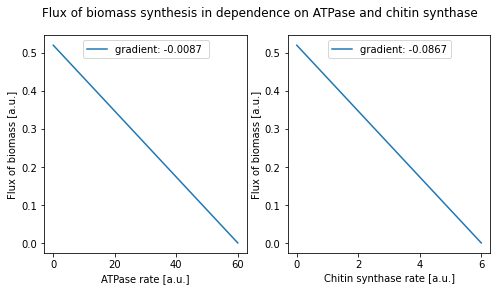

In [8]:
plt.figure(figsize=(8,4),edgecolor='blue')

plt.subplot(121)
#new_xs=xs*-1
#plt.title('Flux of biomass synthesis in dependence on ATPase and chitin synthase', fontsize=15)
plt.plot(xs,ys,label= 'gradient: -0.0087 ')
plt.legend(loc='upper center')
plt.xlabel('ATPase rate [$\frac{mmol }{g_{DW} h}$]')
plt.ylabel('Flux of biomass [$\frac{mmol }{g_{DW} h}$]')


plt.subplot(122) 
#plt.title('Flux of biomass synthesis in dependence on ATPase and chitin synthase',  fontsize=8)
plt.plot(xs1,ys1,label='gradient: -0.0867')
plt.legend(loc='upper center')
plt.xlabel('Chitin synthase rate [$\frac{mmol }{g_{DW} h}$]')
#plt.xlim(0,60)
plt.ylabel('Flux of biomass [$\frac{mmol }{g_{DW} h}$]')
plt.suptitle('Flux of biomass synthesis in dependence on ATPase and chitin synthase', fontsize=12)
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/Flux of biomass synthesis in dependence on ATPase and chitin synthase.pdf', bbox_inches="tight")
plt.show()

In [9]:
model.reactions.__getattr__('ATPase').lower_bound= 60
model.reactions.__getattr__('CHITIN-SYN').lower_bound= 0
model.optimize()
fva=cobra.flux_analysis.flux_variability_analysis(model, model.reactions[:3394])
fva.head()

,minimum,maximum
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,6.787990e-13
1.1.1.127-RXN_c,0.0,0.000000e+00
1.1.1.178-RXN_c,0.0,0.000000e+00
1.1.1.190-RXN_c,0.0,6.666165e-13
1.1.1.210-RXN_c,0.0,0.000000e+00


In [10]:
eps= 2
namesN=list(fva.index)
minN=np.array(list(fva['minimum']))
maxN=np.array(list(fva['maximum']))
n=len(namesN)
#filtere Null Intervalle
names3=[]
minimum3=[]
maximum3=[]

for i in range(n):
    #if abs(minN[i]-maxN[i])>eps:
    if abs(minN[i])>eps and abs(maxN[i])>eps:
        if abs(maxN[i])<990 and abs(minN[i])<990:
          
    # if abs(minM[i])>eps:
            names3.append(namesN[i])
            minimum3.append(minN[i])
            maximum3.append(maxN[i])


d= panda.DataFrame()
d['names3']= names3
d['minimum3']= minimum3
d['maximum3']= maximum3
print(d)
len(names3)
model.reactions.__getattr__('ATPase').lower_bound= 0

                        names3  minimum3  maximum3
0           2PGADEHYDRAT-RXN_c      20.0      20.0
1            6PFRUCTPHOS-RXN_c      10.0      10.0
2               ATPSYN-RXN_c_p     -40.0     -40.0
3            F16ALDOLASE-RXN_c      10.0      10.0
4   HOMOCITRATE-SYNTHASE-RXN_c      20.0      20.0
5         KETOGLUTREDUCT-RXN_c      20.0      20.0
6              PEPDEPHOS-RXN_c      20.0      20.0
7            PHOSGLYPHOS-RXN_c     -20.0     -20.0
8               PYRUVDEH-RXN_c      20.0      20.0
9                  RXN-15513_c     -20.0     -20.0
10                 RXN-21282_c      20.0      20.0
11  TRIOSEPISOMERIZATION-RXN_c     -10.0     -10.0
12      RXN1YI0-15__var__0_c_p      40.0      40.0
13                  RXN-7970_c      20.0      20.0
14                 RXN-13722_c      20.0      20.0
15                      ATPase      60.0      60.0
16        TR_ALPHA-GLUCOSE_c_e     -10.0     -10.0
17      TR_OXYGEN-MOLECULE_c_e     -60.0     -60.0
18          EX_ALPHA-GLUCOSE_e 

In [11]:
model.reactions.__getattr__('ATPase').lower_bound= 0
model.reactions.__getattr__('CHITIN-SYN').lower_bound= 0
model.optimize()
fva=cobra.flux_analysis.flux_variability_analysis(model, model.reactions[:3394])
fva.head()
#model.optimize()

eps= 2
namesN=list(fva.index)
minN=np.array(list(fva['minimum']))
maxN=np.array(list(fva['maximum']))
n=len(namesN)
#filtere Null Intervalle
names1=[]
minimum1=[]
maximum1=[]

for i in range(n):
    #if abs(minN[i]-maxN[i])>eps:
    if abs(minN[i])>eps and abs(maxN[i])>eps:
        if abs(maxN[i])<990 and abs(minN[i])<990:
          
    # if abs(minM[i])>eps:
            names1.append(namesN[i])
            minimum1.append(minN[i])
            maximum1.append(maxN[i])


df1= panda.DataFrame()
df1['names1']= names1
df1['minimum1']= minimum1
df1['maximum1']= maximum1
print(df1)

len(names1)

                        names1   minimum1   maximum1
0           2PGADEHYDRAT-RXN_c  18.236227  18.236227
1            6PFRUCTPHOS-RXN_c   9.176261   9.176261
2               ATPSYN-RXN_c_p -24.522163 -24.522163
3            F16ALDOLASE-RXN_c   9.176261   9.176261
4   HOMOCITRATE-SYNTHASE-RXN_c  11.356001  11.356001
5         KETOGLUTREDUCT-RXN_c  11.182635  11.182635
6              PEPDEPHOS-RXN_c  17.852270  17.852270
7            PHOSGLYPHOS-RXN_c -18.236227 -18.236227
8   PYRUVATE-CARBOXYLASE-RXN_c   2.582978   2.582978
9               PYRUVDEH-RXN_c  13.733676  13.733676
10                 RXN-15513_c -18.236227 -18.236227
11                 RXN-21282_c  11.182635  11.182635
12  TRIOSEPISOMERIZATION-RXN_c  -9.127238  -9.127238
13      RXN1YI0-15__var__0_c_p  24.522163  24.522163
14                  RXN-7970_c  11.356001  11.356001
15                 RXN0-5224_c -37.242879  -2.872754
16                 RXN-13722_c  11.356001  11.356001
17        TR_ALPHA-GLUCOSE_c_e -10.000000 -10.

24

In [12]:
model.reactions.__getattr__('ATPase').lower_bound= 0
model.reactions.__getattr__('CHITIN-SYN').lower_bound= 6
model.optimize()
fva=cobra.flux_analysis.flux_variability_analysis(model, model.reactions[:3394])
fva.head()
model.reactions.__getattr__('CHITIN-SYN').lower_bound= 6
model.optimize()

eps= 2
namesN=list(fva.index)
minN=np.array(list(fva['minimum']))
maxN=np.array(list(fva['maximum']))
n=len(namesN)
#filtere Null Intervalle
names4=[]
minimum4=[]
maximum4=[]

for i in range(n):
    #if abs(minN[i]-maxN[i])>eps:
    if abs(minN[i])>eps and abs(maxN[i])>eps:
        if abs(maxN[i])<990 and abs(minN[i])<990:
          
    # if abs(minM[i])>eps:
            names4.append(namesN[i])
            minimum4.append(minN[i])
            maximum4.append(maxN[i])


df4= panda.DataFrame()
df4['names4']= names4
df4['minimum4']= minimum4
df4['maximum4']= maximum4
print(df1)

len(names1)

                        names1   minimum1   maximum1
0           2PGADEHYDRAT-RXN_c  18.236227  18.236227
1            6PFRUCTPHOS-RXN_c   9.176261   9.176261
2               ATPSYN-RXN_c_p -24.522163 -24.522163
3            F16ALDOLASE-RXN_c   9.176261   9.176261
4   HOMOCITRATE-SYNTHASE-RXN_c  11.356001  11.356001
5         KETOGLUTREDUCT-RXN_c  11.182635  11.182635
6              PEPDEPHOS-RXN_c  17.852270  17.852270
7            PHOSGLYPHOS-RXN_c -18.236227 -18.236227
8   PYRUVATE-CARBOXYLASE-RXN_c   2.582978   2.582978
9               PYRUVDEH-RXN_c  13.733676  13.733676
10                 RXN-15513_c -18.236227 -18.236227
11                 RXN-21282_c  11.182635  11.182635
12  TRIOSEPISOMERIZATION-RXN_c  -9.127238  -9.127238
13      RXN1YI0-15__var__0_c_p  24.522163  24.522163
14                  RXN-7970_c  11.356001  11.356001
15                 RXN0-5224_c -37.242879  -2.872754
16                 RXN-13722_c  11.356001  11.356001
17        TR_ALPHA-GLUCOSE_c_e -10.000000 -10.

24

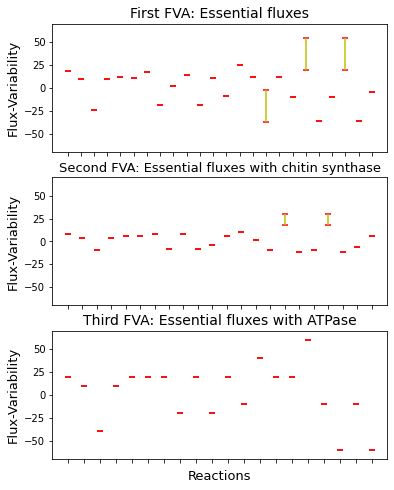

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,8),edgecolor='blue')

plt.subplot(311)
plt.ylim(-70,70)
plt.scatter(x='names1',y='minimum1',data=df1,color='r',marker='_')
plt.scatter(x='names1',y='maximum1',data=df1,color='r',marker='_')
plt.vlines(x='names1',ymin='minimum1',ymax='maximum1',data=df1,color='y')
plt.title('First FVA: Essential fluxes', fontsize=14)
#plt.xlabel('Reaktionsnamen')
plt.ylabel('Flux-Variability', fontsize=13)
plt.setp(plt.gca(),'xticklabels',[])


plt.subplot(313)
plt.ylim(-70,70)
plt.scatter(x='names3',y='minimum3',data=d,color='r',marker='_')
plt.scatter(x='names3',y='maximum3',data=d,color='r',marker='_')
plt.vlines(x='names3',ymin='minimum3',ymax='maximum3',data=d,color='y')
plt.title('Third FVA: Essential fluxes with ATPase', fontsize=14)
plt.xlabel('Reactions', fontsize=13)
plt.ylabel('Flux-Variability', fontsize=13)
plt.setp(plt.gca(),'xticklabels',[])

plt.subplot(312)
plt.ylim(-70,70)
plt.scatter(x='names4',y='minimum4',data=df4,color='r',marker='_')
plt.scatter(x='names4',y='maximum4',data=df4,color='r',marker='_')
plt.vlines(x='names4',ymin='minimum4',ymax='maximum4',data=df4,color='y')
plt.title('Second FVA: Essential fluxes with chitin synthase', fontsize=13)
#plt.xlabel('Reactions')
plt.ylabel('Flux-Variability', fontsize=13)
plt.setp(plt.gca(),'xticklabels',[])
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/FVA of essential FLux with and without ATPase.pdf', bbox_inches="tight")
plt.show()

In [14]:
for i in names1:
    if i not in names3:
        print(i)
len(names3)

PYRUVATE-CARBOXYLASE-RXN_c
RXN0-5224_c
TR_WATER_c_e
EX_WATER_e
EX_Pi_e


20

In [15]:
for i in names3:
    if i not in names1:
        print(i)

ATPase


In [16]:
for i in names1:
    if i not in names4:
        print(i)

HOMOCITRATE-SYNTHASE-RXN_c
KETOGLUTREDUCT-RXN_c
PYRUVATE-CARBOXYLASE-RXN_c
RXN-21282_c
RXN-7970_c
RXN0-5224_c


In [17]:
for i in names4:
    if i not in names1:
        print(i)

GLUTAMINESYN-RXN_c
L-GLN-FRUCT-6-P-AMINOTRANS-RXN__var__0_c
UDPKIN-RXN_c
CHITIN-SYN
